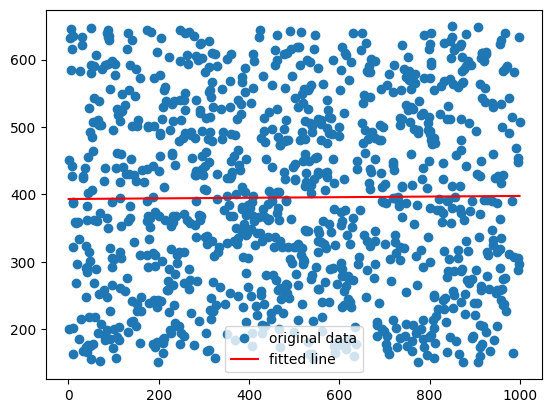

In [5]:
import random
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

def value(alpha = 0.95):
    x = 1000 * random.random()
    y = 0.5 * x + random.gauss(0, 3) + 150
    if random.random() < alpha:
        y = random.uniform(150, 650)
    return x, y

values = [value() for _ in range(1000)]
values.sort()

x = np.array([v[0] for v in values])
y = np.array([v[1] for v in values])
res = stats.linregress(x, y) 
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

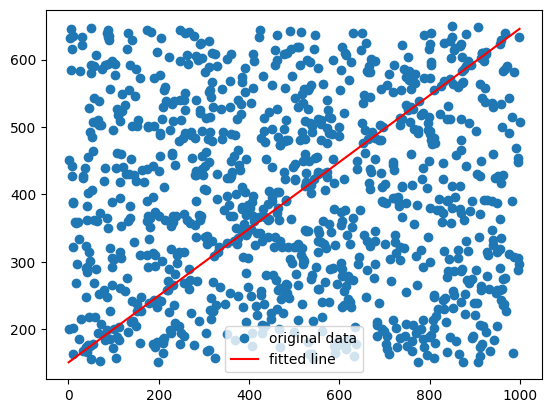

In [45]:
def fit_line(data):
    [[x, y], [x1, y1]] = data
    slope = (y1 - y) / (x1 - x)
    bias = y - x * slope

    return (slope, bias)

def ransac(data, n, k, t, do_linreg=True):
    best_count = 0
    best_model = ()

    for _ in range(k):
        maybe_inliners = random.sample(list(data), n)

        if n == 2:
            (maybe_a, maybe_b) = fit_line(maybe_inliners)
        else:
            mi_arr = np.array(maybe_inliners)
            maybe_res = stats.linregress(mi_arr[:, 0], mi_arr[:, 1])
            (maybe_a, maybe_b) = (maybe_res.slope, maybe_res.intercept) 

        also_inliners = []

        for p in data:
            if not any([(p == mi).all() for mi in maybe_inliners]):
                if ((maybe_a * p[0] + maybe_b - p[1])**2 < t):
                    also_inliners.append(p)

        if len(also_inliners) + 2 > best_count:
            best_count = len(also_inliners) + 2

            if do_linreg:
                dataset = np.array(also_inliners + maybe_inliners)

                res = stats.linregress(dataset[:,0], dataset[:,1])
                best_model = (res.slope, res.intercept)
            else:
                best_model = (maybe_a, maybe_b)

    return best_model

data = np.array([x, y]).T
(a,b) = ransac(data, 2, 1000, 10)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, b + a * x, 'r', label='fitted line')
plt.legend()
plt.show()